# Rf 7 0 8_Bphysics

Special p.d.f.'s: special decay pdf for B physics with mixing and/or CP violation




**Author:** Clemens Lange, Wouter Verkerke (C++ version)  
<i><small>This notebook tutorial was automatically generated with <a href= "https://github.com/root-project/root/blob/master/documentation/doxygen/converttonotebook.py">ROOTBOOK-izer</a> from the macro found in the ROOT repository  on Thursday, August 29, 2019 at 03:03 AM.</small></i>

In [1]:
import ROOT

Welcome to JupyROOT 6.18/03


B-decay with mixing
-------------------------

Construct pdf
-------------------------

Observable

In [2]:
dt = ROOT.RooRealVar("dt", "dt", -10, 10)
dt.setBins(40)


RooFit v3.60 -- Developed by Wouter Verkerke and David Kirkby 
                Copyright (C) 2000-2013 NIKHEF, University of California & Stanford University
                All rights reserved, please read http://roofit.sourceforge.net/license.txt



Parameters

In [3]:
dm = ROOT.RooRealVar("dm", "delta m(B0)", 0.472)
tau = ROOT.RooRealVar("tau", "tau (B0)", 1.547)
w = ROOT.RooRealVar("w", "flavour mistag rate", 0.1)
dw = ROOT.RooRealVar("dw", "delta mistag rate for B0/B0bar", 0.1)

mixState = ROOT.RooCategory("mixState", "B0/B0bar mixing state")
mixState.defineType("mixed", -1)
mixState.defineType("unmixed", 1)

tagFlav = ROOT.RooCategory("tagFlav", "Flavour of the tagged B0")
tagFlav.defineType("B0", 1)
tagFlav.defineType("B0bar", -1)

False

Use delta function resolution model

In [4]:
tm = ROOT.RooTruthModel("tm", "truth model", dt)

Construct Bdecay with mixing

In [5]:
bmix = ROOT.RooBMixDecay(
    "bmix",
    "decay",
    dt,
    mixState,
    tagFlav,
    tau,
    dm,
    w,
    dw,
    tm,
    ROOT.RooBMixDecay.DoubleSided)

Plot pdf in various slices
---------------------------------------------------

Generate some data

In [6]:
data = bmix.generate(ROOT.RooArgSet(dt, mixState, tagFlav), 10000)

Plot B0 and B0bar tagged data separately
For all plots below B0 and B0 tagged data will look somewhat differently
if the flavor tagging mistag rate for B0 and B0 is different (i.e. dw!=0)

In [7]:
frame1 = dt.frame(ROOT.RooFit.Title(
    "B decay distribution with mixing (B0/B0bar)"))

data.plotOn(frame1, ROOT.RooFit.Cut("tagFlav==tagFlav::B0"))
bmix.plotOn(frame1, ROOT.RooFit.Slice(tagFlav, "B0"))

data.plotOn(frame1, ROOT.RooFit.Cut("tagFlav==tagFlav::B0bar"),
            ROOT.RooFit.MarkerColor(ROOT.kCyan))
bmix.plotOn(frame1, ROOT.RooFit.Slice(tagFlav, "B0bar"),
            ROOT.RooFit.LineColor(ROOT.kCyan))

<ROOT.RooPlot object ("frame_dt_55869cd83e60") at 0x55869cd83e60>

[#1] INFO:Plotting -- RooTreeData::plotOn: plotting 4542 events out of 10000 total events
[#1] INFO:Plotting -- RooAbsReal::plotOn(bmix) plot on dt represents a slice in (tagFlav)
[#1] INFO:Plotting -- RooAbsReal::plotOn(bmix) plot on dt integrates over variables (mixState)
[#1] INFO:Plotting -- RooTreeData::plotOn: plotting 5458 events out of 10000 total events
[#1] INFO:Plotting -- RooAbsReal::plotOn(bmix) plot on dt represents a slice in (tagFlav)
[#1] INFO:Plotting -- RooAbsReal::plotOn(bmix) plot on dt integrates over variables (mixState)


Plot mixed slice for B0 and B0bar tagged data separately

In [8]:
frame2 = dt.frame(ROOT.RooFit.Title(
    "B decay distribution of mixed events (B0/B0bar)"))

data.plotOn(frame2, ROOT.RooFit.Cut(
    "mixState==mixState::mixed&&tagFlav==tagFlav::B0"))
bmix.plotOn(frame2, ROOT.RooFit.Slice(tagFlav, "B0"),
            ROOT.RooFit.Slice(mixState, "mixed"))

data.plotOn(
    frame2,
    ROOT.RooFit.Cut("mixState==mixState::mixed&&tagFlav==tagFlav::B0bar"),
    ROOT.RooFit.MarkerColor(
        ROOT.kCyan))
bmix.plotOn(frame2, ROOT.RooFit.Slice(tagFlav, "B0bar"), ROOT.RooFit.Slice(
    mixState, "mixed"), ROOT.RooFit.LineColor(ROOT.kCyan))

<ROOT.RooPlot object ("frame_dt_55869cddc480") at 0x55869cddc480>

[#1] INFO:Plotting -- RooTreeData::plotOn: plotting 933 events out of 10000 total events
[#1] INFO:Plotting -- RooAbsReal::plotOn(bmix) plot on dt represents a slice in (mixState,tagFlav)
[#1] INFO:Plotting -- RooTreeData::plotOn: plotting 1461 events out of 10000 total events
[#1] INFO:Plotting -- RooAbsReal::plotOn(bmix) plot on dt represents a slice in (mixState,tagFlav)


Plot unmixed slice for B0 and B0bar tagged data separately

In [9]:
frame3 = dt.frame(ROOT.RooFit.Title(
    "B decay distribution of unmixed events (B0/B0bar)"))

data.plotOn(frame3, ROOT.RooFit.Cut(
    "mixState==mixState::unmixed&&tagFlav==tagFlav::B0"))
bmix.plotOn(frame3, ROOT.RooFit.Slice(tagFlav, "B0"),
            ROOT.RooFit.Slice(mixState, "unmixed"))

data.plotOn(
    frame3,
    ROOT.RooFit.Cut("mixState==mixState::unmixed&&tagFlav==tagFlav::B0bar"),
    ROOT.RooFit.MarkerColor(
        ROOT.kCyan))
bmix.plotOn(frame3, ROOT.RooFit.Slice(tagFlav, "B0bar"), ROOT.RooFit.Slice(
    mixState, "unmixed"), ROOT.RooFit.LineColor(ROOT.kCyan))

<ROOT.RooPlot object ("frame_dt_55869ce9df70") at 0x55869ce9df70>

[#1] INFO:Plotting -- RooTreeData::plotOn: plotting 3609 events out of 10000 total events
[#1] INFO:Plotting -- RooAbsReal::plotOn(bmix) plot on dt represents a slice in (mixState,tagFlav)
[#1] INFO:Plotting -- RooTreeData::plotOn: plotting 3997 events out of 10000 total events
[#1] INFO:Plotting -- RooAbsReal::plotOn(bmix) plot on dt represents a slice in (mixState,tagFlav)


B-decay with CP violation
-------------------------

Construct pdf
-------------------------

Additional parameters needed for B decay with CPV

In [10]:
CPeigen = ROOT.RooRealVar("CPeigen", "CP eigen value", -1)
absLambda = ROOT.RooRealVar("absLambda", "|lambda|", 1, 0, 2)
argLambda = ROOT.RooRealVar("absLambda", "|lambda|", 0.7, -1, 1)
effR = ROOT.RooRealVar("effR", "B0/B0bar reco efficiency ratio", 1)

Construct Bdecay with CP violation

In [11]:
bcp = ROOT.RooBCPEffDecay(
    "bcp",
    "bcp",
    dt,
    tagFlav,
    tau,
    dm,
    w,
    CPeigen,
    absLambda,
    argLambda,
    effR,
    dw,
    tm,
    ROOT.RooBCPEffDecay.DoubleSided)

Plot scenario 1 - sin(2b)=0.7, |l|=1
---------------------------------------------------------------------------

Generate some data

In [12]:
data2 = bcp.generate(ROOT.RooArgSet(dt, tagFlav), 10000)

Plot B0 and B0bar tagged data separately

In [13]:
frame4 = dt.frame(ROOT.RooFit.Title(
    "B decay distribution with CPV(|l|=1,Im(l)=0.7) (B0/B0bar)"))

data2.plotOn(frame4, ROOT.RooFit.Cut("tagFlav==tagFlav::B0"))
bcp.plotOn(frame4, ROOT.RooFit.Slice(tagFlav, "B0"))

data2.plotOn(frame4, ROOT.RooFit.Cut("tagFlav==tagFlav::B0bar"),
             ROOT.RooFit.MarkerColor(ROOT.kCyan))
bcp.plotOn(frame4, ROOT.RooFit.Slice(tagFlav, "B0bar"),
           ROOT.RooFit.LineColor(ROOT.kCyan))

<ROOT.RooPlot object ("frame_dt_55869c5efea0") at 0x55869c5efea0>

[#1] INFO:Plotting -- RooTreeData::plotOn: plotting 4495 events out of 10000 total events
[#1] INFO:Plotting -- RooAbsReal::plotOn(bcp) plot on dt represents a slice in (tagFlav)
[#1] INFO:Plotting -- RooTreeData::plotOn: plotting 5505 events out of 10000 total events
[#1] INFO:Plotting -- RooAbsReal::plotOn(bcp) plot on dt represents a slice in (tagFlav)


# Plot scenario 2 - sin(2b)=0.7, |l|=0.7
-------------------------------------------------------------------------------

In [14]:
absLambda.setVal(0.7)

Generate some data

In [15]:
data3 = bcp.generate(ROOT.RooArgSet(dt, tagFlav), 10000)

Plot B0 and B0bar tagged data separately (sin2b = 0.7 plus direct CPV
|l|=0.5)

In [16]:
frame5 = dt.frame(ROOT.RooFit.Title(
    "B decay distribution with CPV(|l|=0.7,Im(l)=0.7) (B0/B0bar)"))

data3.plotOn(frame5, ROOT.RooFit.Cut("tagFlav==tagFlav::B0"))
bcp.plotOn(frame5, ROOT.RooFit.Slice(tagFlav, "B0"))

data3.plotOn(frame5, ROOT.RooFit.Cut("tagFlav==tagFlav::B0bar"),
             ROOT.RooFit.MarkerColor(ROOT.kCyan))
bcp.plotOn(frame5, ROOT.RooFit.Slice(tagFlav, "B0bar"),
           ROOT.RooFit.LineColor(ROOT.kCyan))

<ROOT.RooPlot object ("frame_dt_55869cee2530") at 0x55869cee2530>

[#1] INFO:Plotting -- RooTreeData::plotOn: plotting 3617 events out of 10000 total events
[#1] INFO:Plotting -- RooAbsReal::plotOn(bcp) plot on dt represents a slice in (tagFlav)
[#1] INFO:Plotting -- RooTreeData::plotOn: plotting 6383 events out of 10000 total events
[#1] INFO:Plotting -- RooAbsReal::plotOn(bcp) plot on dt represents a slice in (tagFlav)


Generic B-decay with user coefficients
-------------------------

Construct pdf
-------------------------

Model parameters

In [17]:
DGbG = ROOT.RooRealVar("DGbG", "DGamma/GammaAvg", 0.5, -1, 1)
Adir = ROOT.RooRealVar("Adir", "-[1-abs(l)**2]/[1+abs(l)**2]", 0)
Amix = ROOT.RooRealVar("Amix", "2Im(l)/[1+abs(l)**2]", 0.7)
Adel = ROOT.RooRealVar("Adel", "2Re(l)/[1+abs(l)**2]", 0.7)

Derived input parameters for pdf

In [18]:
DG = ROOT.RooFormulaVar("DG", "Delta Gamma", "@1/@0",
                        ROOT.RooArgList(tau, DGbG))

Construct coefficient functions for sin,cos, modulations of decay
distribution

In [19]:
fsin = ROOT.RooFormulaVar(
    "fsin", "fsin", "@0*@1*(1-2*@2)", ROOT.RooArgList(Amix, tagFlav, w))
fcos = ROOT.RooFormulaVar(
    "fcos", "fcos", "@0*@1*(1-2*@2)", ROOT.RooArgList(Adir, tagFlav, w))
fsinh = ROOT.RooFormulaVar("fsinh", "fsinh", "@0", ROOT.RooArgList(Adel))

Construct generic B decay pdf using above user coefficients

In [20]:
bcpg = ROOT.RooBDecay("bcpg", "bcpg", dt, tau, DG, ROOT.RooFit.RooConst(
    1), fsinh, fcos, fsin, dm, tm, ROOT.RooBDecay.DoubleSided)

Plot - Im(l)=0.7, e(l)=0.7 |l|=1, G/G=0.5
-------------------------------------------------------------------------------------

Generate some data

In [21]:
data4 = bcpg.generate(ROOT.RooArgSet(dt, tagFlav), 10000)

Plot B0 and B0bar tagged data separately

In [22]:
frame6 = dt.frame(ROOT.RooFit.Title(
    "B decay distribution with CPV(Im(l)=0.7,Re(l)=0.7,|l|=1,dG/G=0.5) (B0/B0bar)"))

data4.plotOn(frame6, ROOT.RooFit.Cut("tagFlav==tagFlav::B0"))
bcpg.plotOn(frame6, ROOT.RooFit.Slice(tagFlav, "B0"))

data4.plotOn(frame6, ROOT.RooFit.Cut("tagFlav==tagFlav::B0bar"),
             ROOT.RooFit.MarkerColor(ROOT.kCyan))
bcpg.plotOn(frame6, ROOT.RooFit.Slice(tagFlav, "B0bar"),
            ROOT.RooFit.LineColor(ROOT.kCyan))

c = ROOT.TCanvas("rf708_bphysics", "rf708_bphysics", 1200, 800)
c.Divide(3, 2)
c.cd(1)
ROOT.gPad.SetLeftMargin(0.15)
frame1.GetYaxis().SetTitleOffset(1.6)
frame1.Draw()
c.cd(2)
ROOT.gPad.SetLeftMargin(0.15)
frame2.GetYaxis().SetTitleOffset(1.6)
frame2.Draw()
c.cd(3)
ROOT.gPad.SetLeftMargin(0.15)
frame3.GetYaxis().SetTitleOffset(1.6)
frame3.Draw()
c.cd(4)
ROOT.gPad.SetLeftMargin(0.15)
frame4.GetYaxis().SetTitleOffset(1.6)
frame4.Draw()
c.cd(5)
ROOT.gPad.SetLeftMargin(0.15)
frame5.GetYaxis().SetTitleOffset(1.6)
frame5.Draw()
c.cd(6)
ROOT.gPad.SetLeftMargin(0.15)
frame6.GetYaxis().SetTitleOffset(1.6)
frame6.Draw()

c.SaveAs("rf708_bphysics.png")

[#1] INFO:Plotting -- RooTreeData::plotOn: plotting 4991 events out of 10000 total events
[#1] INFO:Plotting -- RooAbsReal::plotOn(bcpg) plot on dt represents a slice in (tagFlav)
[#1] INFO:Plotting -- RooTreeData::plotOn: plotting 5009 events out of 10000 total events
[#1] INFO:Plotting -- RooAbsReal::plotOn(bcpg) plot on dt represents a slice in (tagFlav)


Info in <TCanvas::Print>: png file rf708_bphysics.png has been created


Draw all canvases 

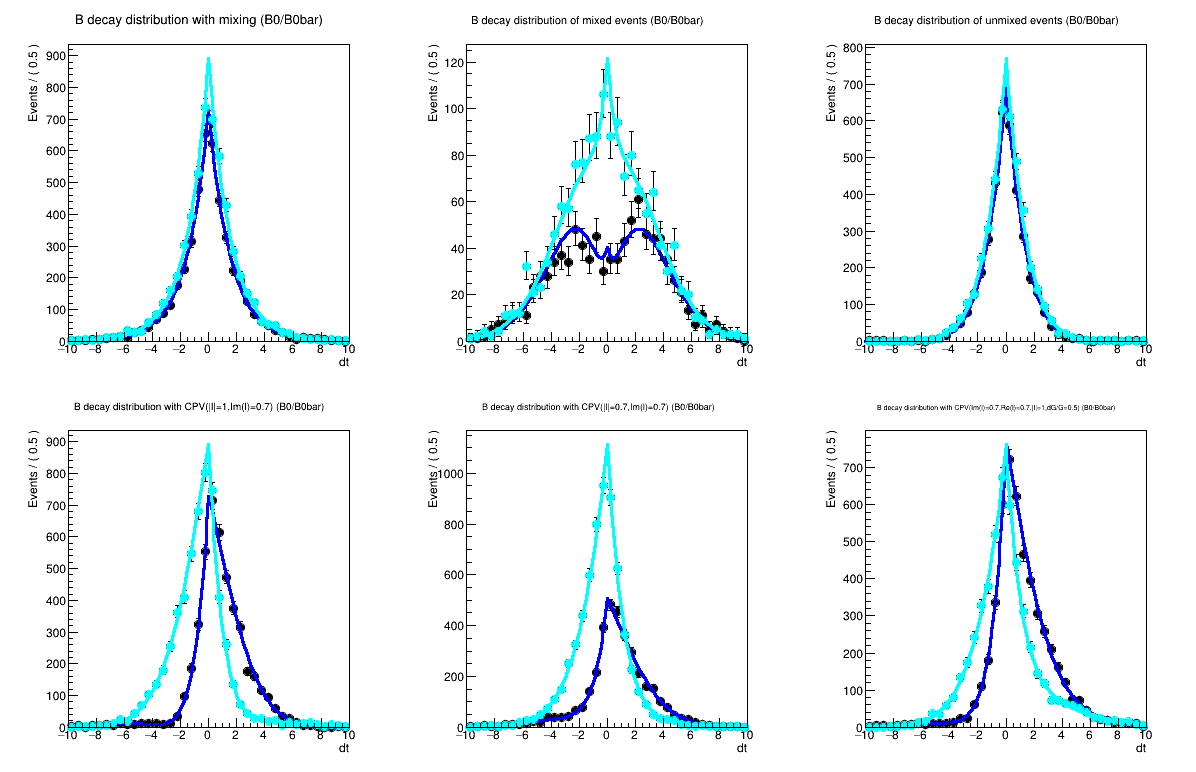

In [23]:
from ROOT import gROOT 
gROOT.GetListOfCanvases().Draw()